### Import all needed Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

<a></a>
## 1. Get the Data

In [28]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (2).csv')
sample = pd.read_csv('sample_submission (2).csv')

## 2- Discover and visualize the data
### A- Data discovery
Check the head of Music's data, and check out its info() and describe() methods.

In [3]:
train.head(3)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10


In [4]:
print(f"The training set shape is {train.shape}, {train.shape[0]} rows and {train.shape[1]} columns(features).")
print(f"The testing set shape is {test.shape}, {test.shape[0]} rows and {test.shape[1]} columns(features).")

The training set shape is (14396, 18), 14396 rows and 18 columns(features).
The testing set shape is (3600, 17), 3600 rows and 17 columns(features).


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

**Notes** 

* .info()method prints information about the DataFrame.*

* The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values) 

* in train we have 2 columns contain object data type (Text or mixed numeric and non-numeric values)

In [6]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [7]:
train.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
test.isna().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

**Note**: 
Popularity,key and instrumentalness feature have missing value

In [9]:
train.duplicated().sum()

0

In [10]:
train.nunique() # to check zero varience


Id                    14396
Artist Name            7913
Track Name            12455
Popularity              100
danceability            887
energy                 1156
key                      11
loudness               8051
mode                      2
speechiness            1177
acousticness           3725
instrumentalness       3945
liveness               1407
valence                1268
tempo                 11392
duration_in min/ms    11805
time_signature            4
Class                    11
dtype: int64

In [11]:
is_col_categorical = (train.dtypes =="object")
all_categorical_cols = list(is_col_categorical[is_col_categorical].index)
all_categorical_cols

['Artist Name', 'Track Name']

In [12]:
train.corr()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.000000,0.009026,0.010947,-0.010074,0.005719,-0.007514,-0.010426,-0.005175,-0.006828,0.004770,-0.008143,-0.002044,-0.004239,0.015961,-0.000916,0.002703
Popularity,0.009026,1.000000,0.172907,0.051820,0.010230,0.124621,0.013747,0.029297,-0.128886,-0.165232,-0.068159,0.054741,-0.002964,-0.027773,0.070232,0.159484
danceability,0.010947,0.172907,1.000000,-0.094806,0.007667,0.056193,-0.069311,0.202985,0.007414,-0.203278,-0.105949,0.444798,-0.180764,-0.127245,0.137127,-0.101152
energy,-0.010074,0.051820,-0.094806,1.000000,0.012834,0.769586,-0.035974,0.120869,-0.746436,-0.187964,0.197802,0.227542,0.205421,0.241190,0.142971,0.215611
key,0.005719,0.010230,0.007667,0.012834,1.000000,0.005738,-0.113318,0.001133,-0.007678,-0.001255,0.014747,0.031505,0.019937,0.014343,0.008123,-0.004175
loudness,-0.007514,0.124621,0.056193,0.769586,0.005738,1.000000,-0.030553,0.090473,-0.614967,-0.350667,0.113663,0.185779,0.161750,0.169003,0.125978,0.174111
mode,-0.010426,0.013747,-0.069311,-0.035974,-0.113318,-0.030553,1.000000,-0.072489,0.020817,-0.019665,-0.002697,-0.007580,0.017616,-0.070849,-0.016817,-0.040092
speechiness,-0.005175,0.029297,0.202985,0.120869,0.001133,0.090473,-0.072489,1.000000,-0.084849,-0.065775,0.072569,0.059227,0.049739,0.006253,0.055992,-0.062784
acousticness,-0.006828,-0.128886,0.007414,-0.746436,-0.007678,-0.614967,0.020817,-0.084849,1.000000,0.182656,-0.109400,-0.127707,-0.162988,-0.321357,-0.139500,-0.240609
instrumentalness,0.004770,-0.165232,-0.203278,-0.187964,-0.001255,-0.350667,-0.019665,-0.065775,0.182656,1.000000,-0.049089,-0.228681,-0.036254,-0.010012,-0.067573,-0.028631


### B- Data visualization

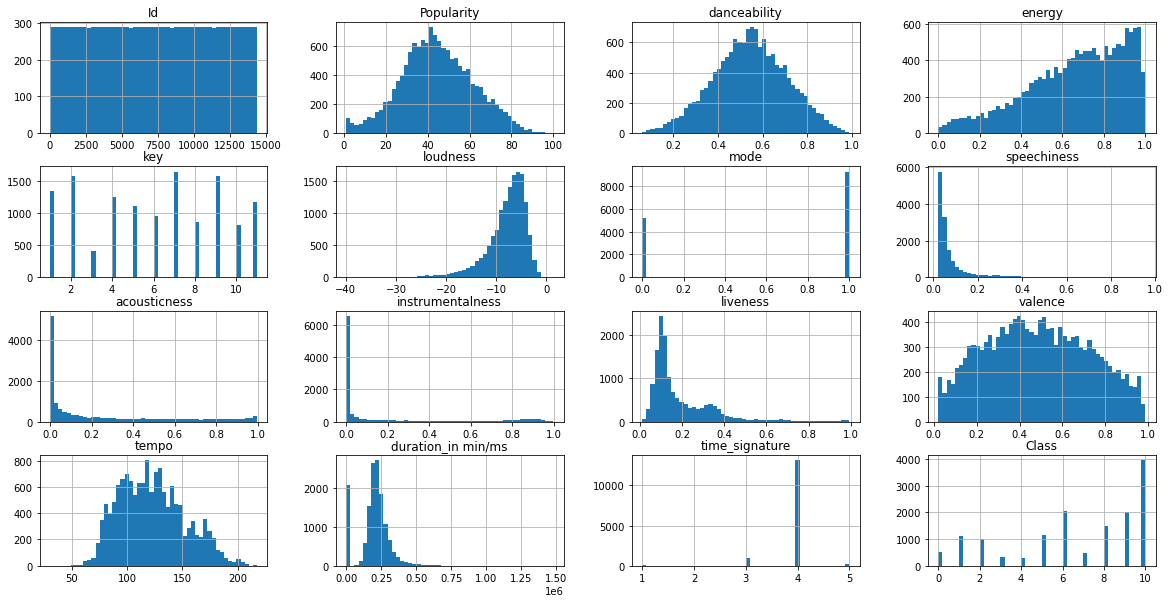

In [13]:
train.hist(bins=50, figsize=(20,10))
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'tempo Density')]

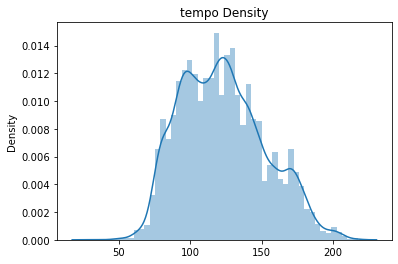

In [14]:
plt.figure()
sns.distplot(x=train['tempo']).set(title='tempo Density')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Popularity Density')]

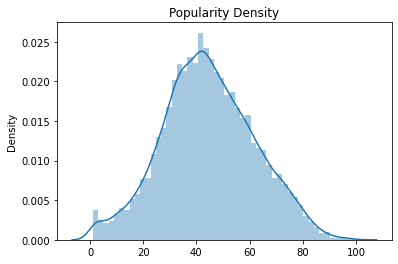

In [15]:
plt.figure()
sns.distplot(x=train['Popularity']).set(title='Popularity Density')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'instrumentalness Density')]

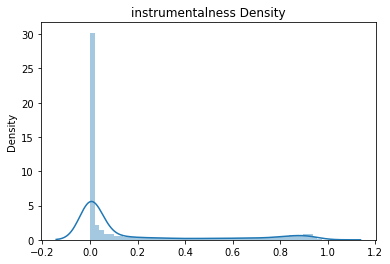

In [16]:
plt.figure()
sns.distplot(x=train['instrumentalness']).set(title='instrumentalness Density')

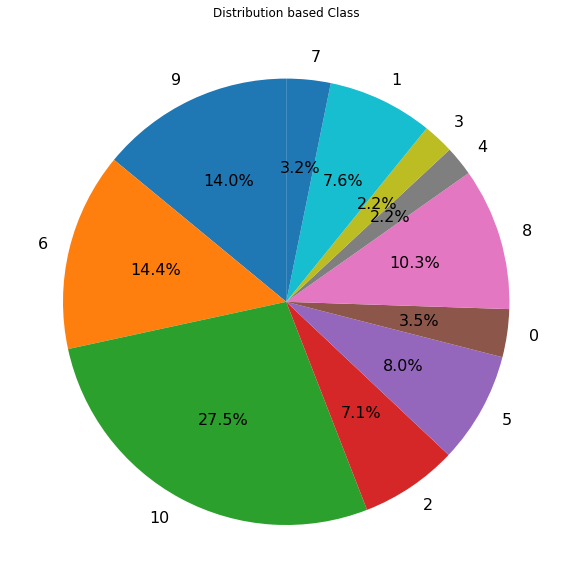

In [17]:
groupdata = train.groupby("Class").count()
x_vals = []
y_vals = []
for i in train['Class'].unique(): 
    x_vals.append(groupdata.index[i])
    y_vals.append(groupdata.iloc[i,0])
plt.figure(figsize = [10,15])
plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

plt.title("Distribution based Class")
plt.show()

[Text(0.5, 1.0, 'Correlation Between Features')]

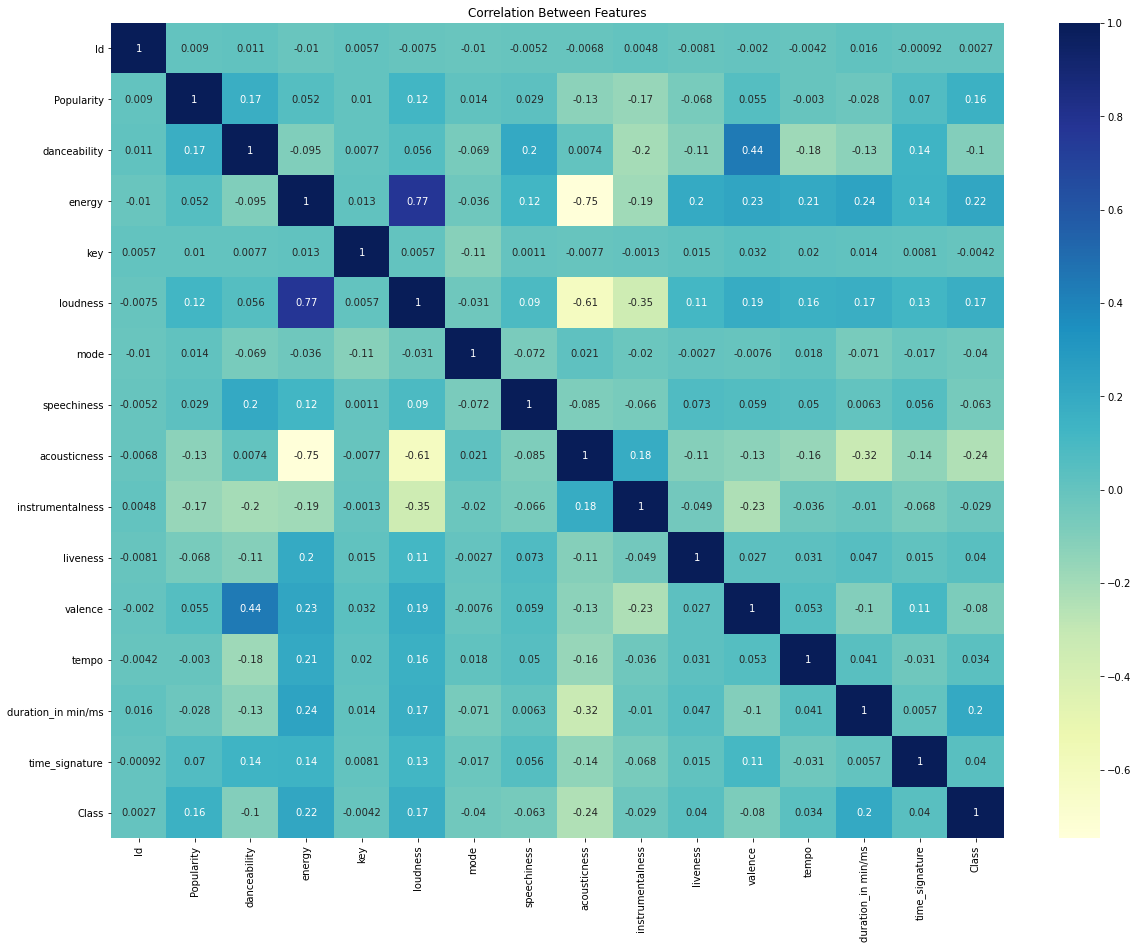

In [18]:
sns.heatmap
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(train.corr(), annot=True, cmap="YlGnBu",ax=ax).set(title='Correlation Between Features')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Popularity'>

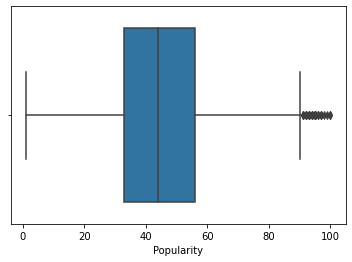

In [19]:
sns.boxplot(train['Popularity'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='danceability'>

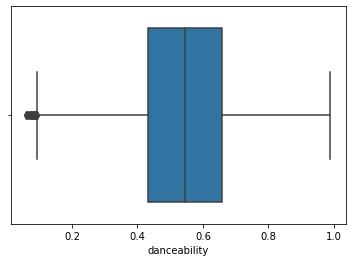

In [20]:
sns.boxplot(train['danceability'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speechiness'>

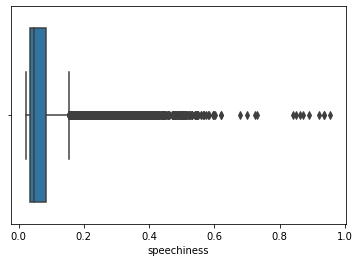

In [21]:
sns.boxplot(train['speechiness'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='instrumentalness'>

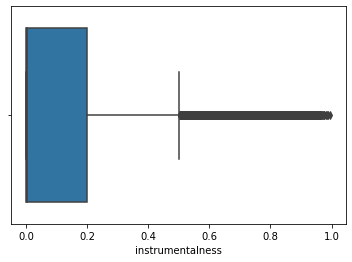

In [22]:
sns.boxplot(train['instrumentalness'])

## 3- Prepare the data
### A- Data Cleaning and Feature Selection

 
 

In [29]:
train.Popularity = train.Popularity.fillna(value=train.Popularity.median(), axis=0)
train.key = train.key.fillna(value=train.key.median(), axis=0)
train.instrumentalness = train.instrumentalness.fillna(value=train.instrumentalness.median(), axis=0)

In [30]:
test.Popularity = test.Popularity.fillna(value=train.Popularity.median(), axis=0)
test.key = test.key.fillna(value=train.key.median(), axis=0)
test.instrumentalness = test.instrumentalness.fillna(value=train.instrumentalness.median(), axis=0)

In [31]:
cont_cols =[
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature']

In [32]:
scaler = StandardScaler()
scaler.fit(train[cont_cols])
train[cont_cols] = scaler.transform(train[cont_cols])

scaler.fit(test[cont_cols])
test[cont_cols] = scaler.transform(test[cont_cols])

In [33]:
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)